In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#take a look at what is in the Station table
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff48465c550>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [10]:
#take a look at what is in the Measurement table
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff485d9f4d0>,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0}

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
print(recent_date)

('2017-08-23',)


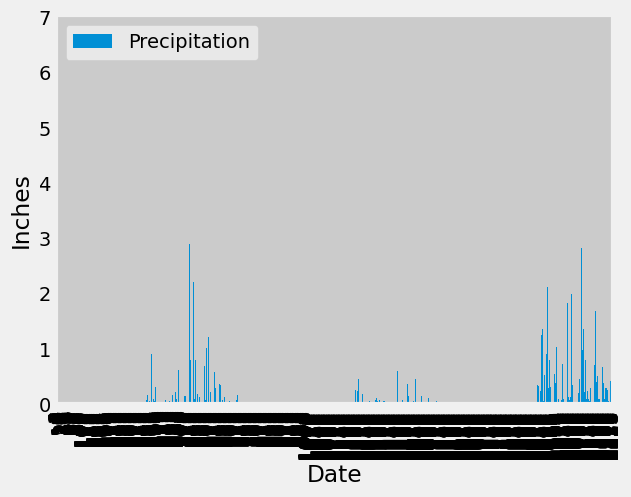

<Figure size 640x480 with 0 Axes>

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_from_recent = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_from_recent).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_year_prcp, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
date = list(df['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
precipitation = list(df['Precipitation'])
df.plot.bar()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()
plt.savefig("../Precipitation_by_date.png")


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(Station.station.distinct())).all()
print(num_stations)

[(9,)]


In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
active_station = session.query(Measurement.station, Measurement.id, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
active_station

('USC00519281', 12188, 2772)

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(Measurement.station, Measurement.id, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

sel = [Measurement.station,
      func.avg(Measurement.tobs),
      func.max(Measurement.tobs),
      func.min(Measurement.tobs)]

calc = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()
print(calc)

[('USC00519281', 71.66378066378067, 85.0, 54.0)]


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= year_from_recent).all()
print(last_year_tobs)

[('2016-08-23', 81.0), ('2016-08-24', 79.0), ('2016-08-25', 80.0), ('2016-08-26', 79.0), ('2016-08-27', 77.0), ('2016-08-28', 78.0), ('2016-08-29', 78.0), ('2016-08-30', 79.0), ('2016-08-31', 80.0), ('2016-09-01', 81.0), ('2016-09-02', 80.0), ('2016-09-03', 79.0), ('2016-09-04', 75.0), ('2016-09-05', 79.0), ('2016-09-06', 76.0), ('2016-09-07', 76.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 78.0), ('2016-09-11', 76.0), ('2016-09-12', 78.0), ('2016-09-13', 78.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 80.0), ('2016-09-17', 79.0), ('2016-09-18', 81.0), ('2016-09-19', 77.0), ('2016-09-20', 77.0), ('2016-09-21', 78.0), ('2016-09-22', 76.0), ('2016-09-23', 82.0), ('2016-09-24', 81.0), ('2016-09-25', 78.0), ('2016-09-26', 80.0), ('2016-09-27', 80.0), ('2016-09-28', 79.0), ('2016-09-29', 80.0), ('2016-09-30', 80.0), ('2016-10-01', 80.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 80.0), ('2016-10-06', 80.0), ('2016-10

In [21]:
df_temp = pd.DataFrame(last_year_tobs, columns=['Date', 'Temperature'])
df_temp.head()

,Date,Temperature
0,2016-08-23,81.0
1,2016-08-24,79.0
2,2016-08-25,80.0
3,2016-08-26,79.0
4,2016-08-27,77.0


In [22]:
temp_count = df_temp.groupby(['Temperature']).count()
temp_count = temp_count.rename(columns={'Temperature': 'Temperature','Date': 'Frequency'})
temp_count

,Frequency
Temperature,
58.0,1
59.0,3
60.0,6
61.0,4
62.0,13
63.0,15
64.0,23
65.0,28
66.0,31


# Close Session

In [23]:
# Close Session
session.close()